# <전기차 충전소 데이터를 통한 행정구역별 인프라 분석>

# (1) 서울시 구역별 전기차 현황

In [17]:
#한글 폰트 설정
from matplotlib import font_manager as fm, rc

font_path='../Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [18]:
import pandas as pd

#서울시 행정동별 친환경자동차 현황 => 전기차만 뽑고, 구역 묶어 주려고 함
FILE_NAME1='서울시 행정동별 친환경자동차 현황_2022년2월28일.csv'
carDF1=pd.read_csv(FILE_NAME1,encoding='cp949')#인코딩
carDF1.head()

,기준년월,사용본거지시읍면동_행정동기준,차명,연료,최초등록일,현소유자의출생년도
0,2022-02,서울특별시 구로구 신도림동,K7 하이브리드,하이브리드(휘발유+전기),2014-03-19,1967.0
1,2022-02,서울특별시 구로구 신도림동,토요타 Prius V,하이브리드(휘발유+전기),2017-04-28,1980.0
2,2022-02,서울특별시 구로구 신도림동,니로 하이브리드,하이브리드(휘발유+전기),2018-04-27,1990.0
3,2022-02,서울특별시 구로구 신도림동,투싼 하이브리드(TUCSON HYBRI,하이브리드(휘발유+전기),2021-07-14,1981.0
4,2022-02,서울특별시 구로구 신도림동,토요타 PRIUS,하이브리드(휘발유+전기),2012-03-16,1983.0


In [19]:
# 주소랑 연료 빼고 필요 없는 칼럼 잘라 줌
recarDF1=carDF1.drop(['기준년월','차명','최초등록일','현소유자의출생년도'],axis=1)
recarDF1.isnull().sum()# 사용본거지시읍면동_행정동기준 데이터 안에 NaN 값이 11개가 있음

사용본거지시읍면동_행정동기준    11
연료                  0
dtype: int64

In [20]:
# NaN 값 있는 행 아예 삭제해 줌
recarDF1.dropna(inplace=True)
recarDF1.isnull().sum()

사용본거지시읍면동_행정동기준    0
연료                 0
dtype: int64

In [21]:
# 주소 전체를 구역별로 나눠 줌
discarDF1=recarDF1['사용본거지시읍면동_행정동기준'].str.split(' ',expand=True)#문자열을 3개로 나눠서 별도의 프레임으로 확장
discarDF1=discarDF1.drop([0,2],axis=1)#'구'만 저장
discarDF1.head()

,1
0,구로구
1,구로구
2,구로구
3,구로구
4,구로구


In [22]:
# recarDF1 데이터에서 주소 칼럼 없애고 연료 칼럼만 따로 저장
fuelDF1=recarDF1.drop(['사용본거지시읍면동_행정동기준'],axis=1)
fuelDF1.head()

,연료
0,하이브리드(휘발유+전기)
1,하이브리드(휘발유+전기)
2,하이브리드(휘발유+전기)
3,하이브리드(휘발유+전기)
4,하이브리드(휘발유+전기)


In [23]:
# 앞에서 분리했던 칼럼들 합쳐 주기
totalDF1=pd.concat([discarDF1,fuelDF1],axis=1)
totalDF1.head()

,1,연료
0,구로구,하이브리드(휘발유+전기)
1,구로구,하이브리드(휘발유+전기)
2,구로구,하이브리드(휘발유+전기)
3,구로구,하이브리드(휘발유+전기)
4,구로구,하이브리드(휘발유+전기)


In [24]:
# 연료가 전기인 것만 뽑음
fuel=totalDF1['연료']
electric=(fuel=='전기')
elecarDF=totalDF1[electric]
elecarDF.head()# 전기차

,1,연료
8,구로구,전기
15,구로구,전기
17,구로구,전기
22,구로구,전기
26,구로구,전기


In [25]:
# 구역별 값 개수 확인
elecarDF[1].value_counts().head()

강남구     12176
구로구      3799
서초구      3497
영등포구     2388
송파구      1991
Name: 1, dtype: int64

In [26]:
# '구역별 전기차 수' 새로운 데이터프레임으로 저장
newDF1=pd.DataFrame(elecarDF[1].value_counts())
newDF1.reset_index(inplace=True)
newDF1.columns=['구역별','전기차 수']
newDF1.sort_values('구역별',inplace=True)#구역별 가나다 순으로 정렬
newDF1.set_index('구역별',inplace=True)
newDF1.head()

,전기차 수
구역별,
강남구,12176
강동구,1294
강북구,514
강서구,1777
관악구,777


In [27]:
# 전기차 수의 평균, 표준편차, 최소값, 최대값 확인
newDF1.describe().iloc[[1,2,3,7]]

,전기차 수
mean,1667.720000
std,2353.401289
min,514.000000
max,12176.000000


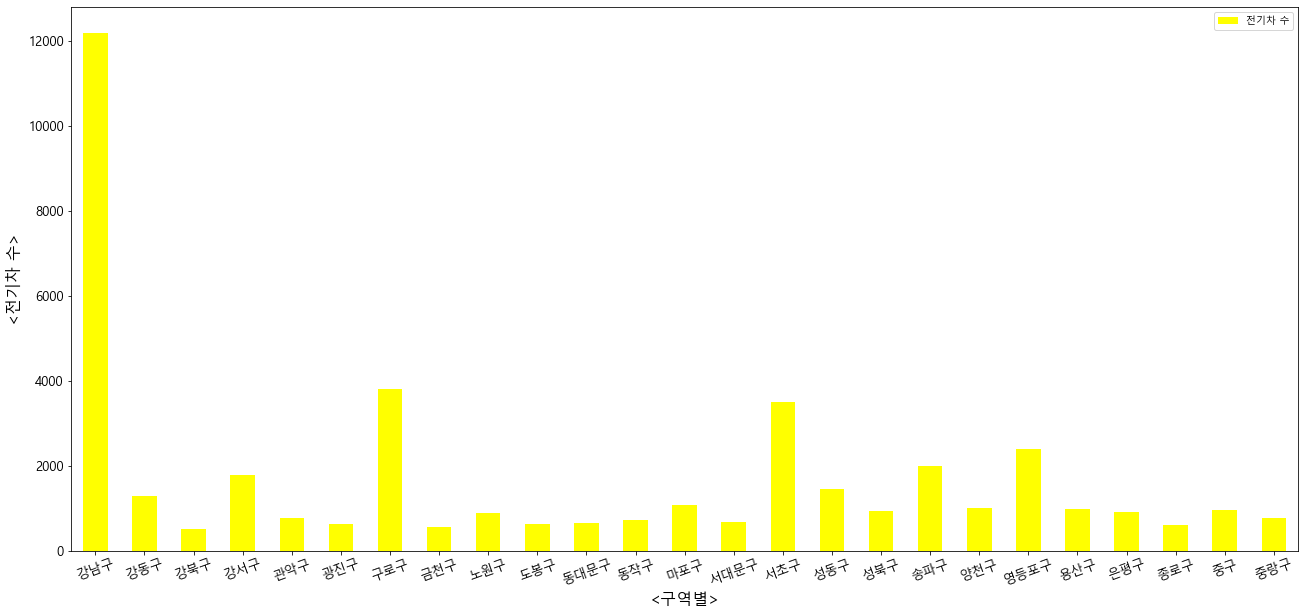

In [28]:
# '구역별 전기차 수' 그래프로 나타내기
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(22,10)#그래프 사이즈 설정
newDF1.plot(kind='bar',color='#FFFF00')#막대 그래프
plt.xlabel('<구역별>',size=16)#X축 이름
plt.ylabel('<전기차 수>',size=16)#Y축 이름
plt.xticks(rotation=20,size=13)
plt.yticks(size=13)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='전기차 수', ylabel='Density'>

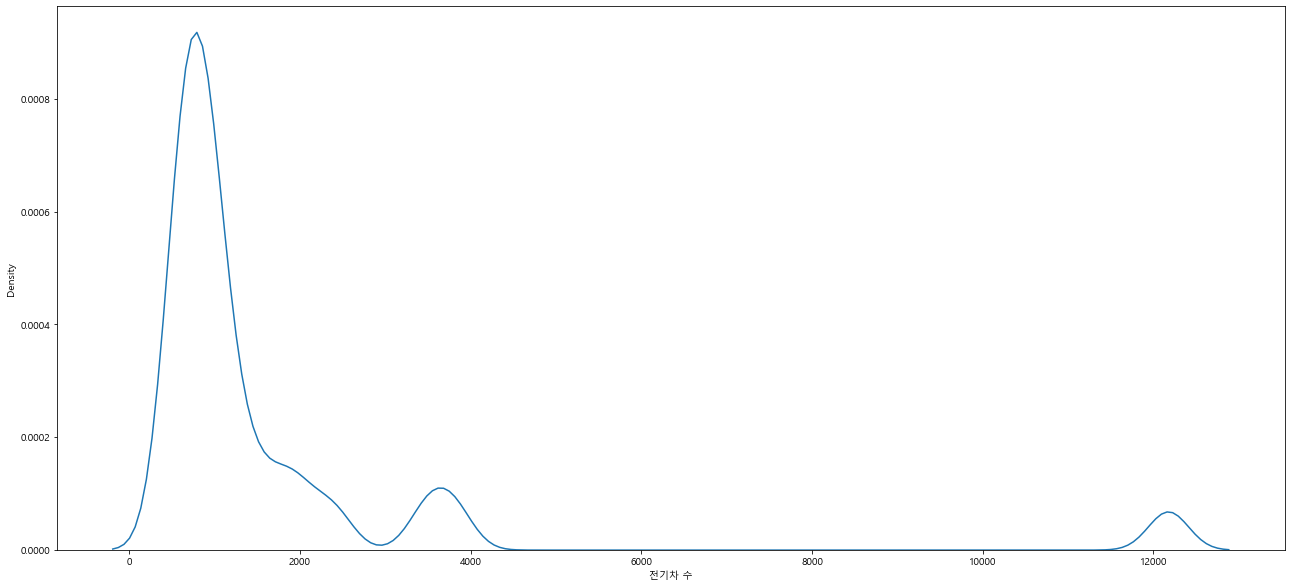

In [29]:
#분포도
import seaborn as sns
sns.kdeplot(newDF1['전기차 수'],bw=0.1)

# (2) 서울시 구역별 충전소 현황

In [30]:
#서울시 충전소 현황 => 전기차만 뽑고, 구역 묶어 주기
FILE_NAME2='서울시 전기차 급속충전기 정보 현황.csv'
carDF2=pd.read_csv(FILE_NAME2,encoding='cp949')#인코딩
carDF2.head()

,광역지자체,시군구,50KW,100KW싱글,100KW듀얼,200KW듀얼,300KW이상,사용량(kWh),등록일시
0,서울특별시,마포구,0,0,6,0,0,3717.56,2020-11-01 23:07:00.0
1,서울특별시,강남구,0,8,0,0,0,18207.24,2020-11-01 23:07:00.0
2,서울특별시,중랑구,1,0,0,0,0,42146.62,2020-11-01 23:07:00.0
3,서울특별시,성북구,2,0,0,0,0,40423.83,2020-11-01 23:07:00.0
4,서울특별시,성동구,2,0,0,0,0,39226.96,2020-11-01 23:07:00.0


In [31]:
# 필요 없는 칼럼 잘라 줌
recarDF2=carDF2.drop(['광역지자체','사용량(kWh)','등록일시'],axis=1)
recarDF2.isnull().sum()

시군구        0
50KW       0
100KW싱글    0
100KW듀얼    0
200KW듀얼    0
300KW이상    0
dtype: int64

In [32]:
# recarDF2 데이터에서 '시군구' 칼럼 빼고 지워 줌
discarDF2=recarDF2.drop(['50KW','100KW싱글','100KW듀얼','200KW듀얼','300KW이상'],axis=1)
discarDF2.head()

,시군구
0,마포구
1,강남구
2,중랑구
3,성북구
4,성동구


In [33]:
# recarDF2에서 충전소 수를 계산하기 위해 값들 더해서 새로운 DF 생성
countDF=recarDF2['50KW']+recarDF2['100KW싱글']+recarDF2['100KW듀얼']+recarDF2['200KW듀얼']+recarDF2['300KW이상']
countDF=pd.DataFrame(countDF)
countDF.head()

,0
0,6
1,8
2,1
3,2
4,2


In [34]:
# 앞에 데이터 2개 합쳐 주기
totalDF2=pd.concat([discarDF2,countDF],axis=1)
totalDF2.head()

,시군구,0
0,마포구,6
1,강남구,8
2,중랑구,1
3,성북구,2
4,성동구,2


In [35]:
# 시군구별 개수
totalDF2.시군구.value_counts().head()

강남구     32
강서구     23
송파구     21
서초구     21
영등포구    20
Name: 시군구, dtype: int64

In [36]:
# 새로운 데이터프레임으로 저장
newDF2=pd.DataFrame(totalDF2.시군구.value_counts())
newDF2.reset_index(inplace=True)
newDF2.columns=['구역별','충전소 수']
newDF2.sort_values('구역별',inplace=True)#구역별 가나다 순으로 정렬
newDF2.set_index('구역별',inplace=True)
newDF2.head()

,충전소 수
구역별,
강남구,32
강동구,12
강북구,7
강서구,23
관악구,11


In [37]:
# 충전소 평균값, 표준편차, 최소값, 최대값
newDF2.describe().iloc[[1,2,3,7]]

,충전소 수
mean,13.800000
std,6.278269
min,6.000000
max,32.000000


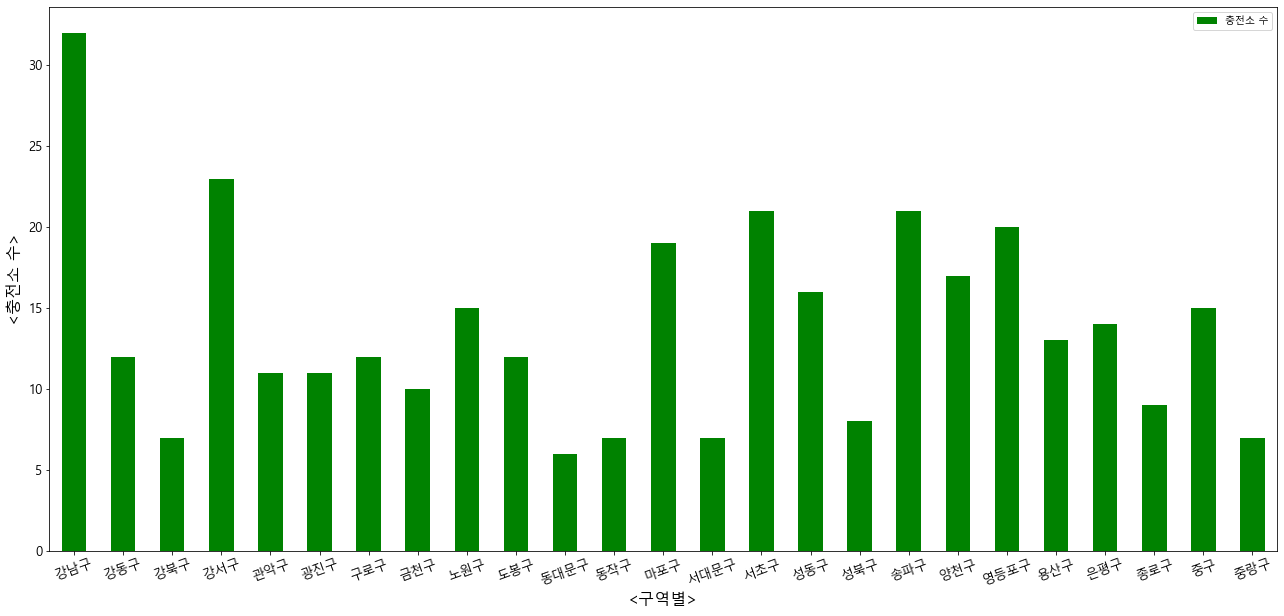

In [38]:
# '구역별 충전소 수' 그래프로 나타내기
newDF2.plot(kind='bar',color='#008200')#막대 그래프
plt.xlabel('<구역별>',size=16)#X축 이름
plt.ylabel('<충전소 수>',size=16)#Y축 이름
plt.xticks(rotation=20,size=13)
plt.yticks(size=13)
plt.show()

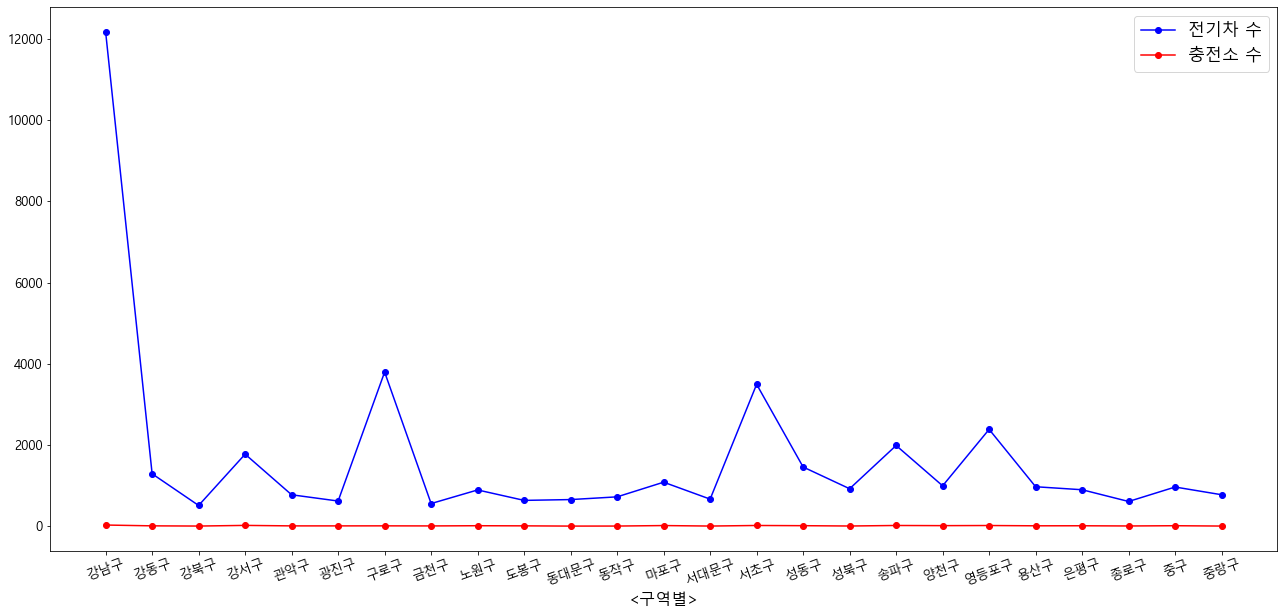

In [39]:
# 전기차 수와 충전소 수 비교 그래프
plt.plot(newDF1,label='전기차 수',color='blue',marker='o')
plt.plot(newDF2,label='충전소 수',color='red',marker='o')
plt.xlabel('<구역별>',size=16)
plt.legend(['전기차 수','충전소 수'],fontsize=17)
plt.xticks(rotation=20,size=13)
plt.yticks(size=13)
plt.show()

# (3) 1-2를 바탕으로 결과 도출

In [40]:
# 1번, 2번 데이터 합치기
reDF=pd.merge(newDF1,newDF2,on='구역별')
reDF.reset_index('구역별',inplace=True)
reDF.head()

,구역별,전기차 수,충전소 수
0,강남구,12176,32
1,강동구,1294,12
2,강북구,514,7
3,강서구,1777,23
4,관악구,777,11


In [41]:
# 구역별 충전소 하나가 감당하는 전기차 수 DF 생성
total=[]
for i in range(25):
    total.append(int(reDF.iloc[i,1]/reDF.iloc[i,2]))#소수점 버림
assignDF=pd.DataFrame(total)
assignDF.columns=['전기차/충전소 수']
resultDF=pd.concat([reDF,assignDF],axis=1)
resultDF.set_index('구역별',inplace=True)
resultDF.head()

,전기차 수,충전소 수,전기차/충전소 수
구역별,,,
강남구,12176,32,380
강동구,1294,12,107
강북구,514,7,73
강서구,1777,23,77
관악구,777,11,70


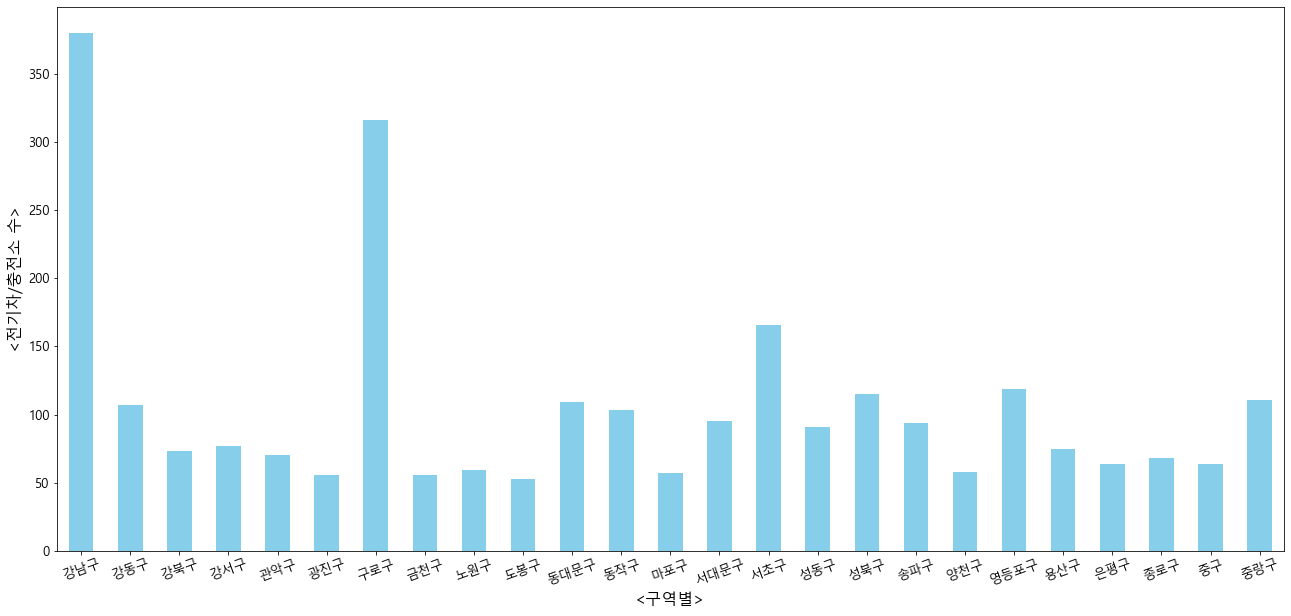

In [42]:
# 구역별 충전소 하나가 감당하는 전기차 수 그래프
resultDF['전기차/충전소 수'].plot(kind='bar',color='skyblue')#막대 그래프
plt.xlabel('<구역별>',size=16)#X축 이름
plt.ylabel('<전기차/충전소 수>',size=16)#Y축 이름
plt.xticks(rotation=20,size=13)
plt.yticks(size=13)
plt.show()

In [43]:
# 구역별 전기차 수 상위 5위
compare=resultDF.sort_values('전기차 수',ascending=False)
compare.head()[['전기차 수']]

,전기차 수
구역별,
강남구,12176
구로구,3799
서초구,3497
영등포구,2388
송파구,1991


In [44]:
# 구역별 충전소 수 상위 5위
compare=resultDF.sort_values('충전소 수',ascending=False)
compare.head()[['충전소 수']]

,충전소 수
구역별,
강남구,32
강서구,23
서초구,21
송파구,21
영등포구,20


In [45]:
# 평균값
resultDF.describe().iloc[[1]][['전기차/충전소 수']]

,전기차/충전소 수
mean,105.44


In [46]:
# 감당해야 할 수가 평균 이상 구역들
meanCount=resultDF.describe()['전기차/충전소 수'][1]
count=resultDF['전기차/충전소 수']
resultDF[count>=meanCount][['전기차/충전소 수']]

,전기차/충전소 수
구역별,
강남구,380
강동구,107
구로구,316
동대문구,109
서초구,166
성북구,115
영등포구,119
중랑구,111


In [47]:
# => 보충이 필요할 것 같은 구역 5위
compare=resultDF.sort_values('전기차/충전소 수',ascending=False)
compare.head()[['전기차/충전소 수']]

,전기차/충전소 수
구역별,
강남구,380
구로구,316
서초구,166
영등포구,119
성북구,115


### ○ 결론 =>
- 1. 전기차 수 & 전기차충전소 수: 상위 5개를 보면 대체적으로 전기차수가 많은 행정구역이 충전소 수도 많다는 것을 알 수 있음. (4개의 구역이 겹침) 
- 2. 충전소 한대당 감당하는 전기차수: 제일 눈에 띄는 강남구를 살펴봤을 때 충전소 수가 제일 많아 다른 구역에 충전소 분포를 집중해야 할 것 같지만 전기차수도 월등하게 많아 충전소 한대당 감당하는 전기차수 순위도 상위권을 차지함. 그렇기 때문에 마냥 충전소 수가 적은 구역를 따지기보다는 위와 같이 충전소와 전기차수의 비율을 고려해 결정할 필요가 있음.